In [ ]:
import numpy as np

def trilinear_interpolation(x, y, z, volume):
    x0, y0, z0 = int(np.floor(x)), int(np.floor(y)), int(np.floor(z))
    x1, y1, z1 = x0 + 1, y0 + 1, z0 + 1
    
    dx, dy, dz = x - x0, y - y0, z - z0
    
    c000 = volume[x0, y0, z0]
    c001 = volume[x0, y0, z1]
    c010 = volume[x0, y1, z0]
    c011 = volume[x0, y1, z1]
    c100 = volume[x1, y0, z0]
    c101 = volume[x1, y0, z1]
    c110 = volume[x1, y1, z0]
    c111 = volume[x1, y1, z1]
    
    c00 = c000 * (1 - dx) + c100 * dx
    c01 = c001 * (1 - dx) + c101 * dx
    c10 = c010 * (1 - dx) + c110 * dx
    c11 = c011 * (1 - dx) + c111 * dx
    
    c0 = c00 * (1 - dy) + c10 * dy
    c1 = c01 * (1 - dy) + c11 * dy
    
    c = c0 * (1 - dz) + c1 * dz
    
    return c

def interpolate_volumes(volume1, volume2, intermediate=1):
    shape = volume1.shape
    volumes = np.zeros((intermediate + 2, *shape), dtype=np.uint8)  # +2 for the original volumes
    
    volumes[0] = volume1
    volumes[-1] = volume2
    
    for i in range(1, intermediate + 1):
        alpha = i / (intermediate + 1)
        for x in range(shape[0]):
            for y in range(shape[1]):
                for z in range(shape[2]):
                    interpolated_value = (1 - alpha) * volume1[x, y, z] + alpha * volume2[x, y, z]
                    volumes[i, x, y, z] = np.uint8(interpolated_value)
    
    return volumes

# Example usage
size_vol=(5,5,5)
volume1 = np.random.randint(0, 2, size=size_vol, dtype=np.uint8)
volume2 = np.random.randint(0, 2, size=size_vol, dtype=np.uint8)

intermediate = 4
interpolated_volumes = interpolate_volumes(volume1, volume2, intermediate)

print(interpolated_volumes)


In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create widgets
volume_slider = widgets.IntSlider(value=0, min=0, max=interpolated_volumes.shape[0] - 1, step=1, description='Volume')
output = widgets.Output()

# Function to update plot
def update_plot(change):
    volume_index = change.new
    volume = interpolated_volumes[volume_index]
    
    with output:
        clear_output(wait=True)
        plt.figure(figsize=(6, 6))
        plt.imshow(volume[:, :, volume.shape[2] // 2], cmap='gray')  # Display a central slice
        plt.title(f'Volume {volume_index}')
        plt.axis('off')
        plt.show()

# Link slider and function
volume_slider.observe(update_plot, names='value')

# Display widgets and initial plot
display(widgets.VBox([volume_slider, output]))
update_plot({'new': volume_slider.value})  # Initial plot update


In [1]:
import numpy as np
from scipy.ndimage import gaussian_filter

def gaussian_interpolation(t, start_val, end_val, sigma=1.0):
    return (1 - t) * start_val + t * gaussian_filter(end_val, sigma)

def interpolate_volumes(A, B, steps, sigma=1.0):
    intermediate_volumes = np.zeros((steps, *A.shape))

    for i in range(steps):
        t = i / (steps - 1)  # Interpolation factor
        interpolated_shape = gaussian_interpolation(t, A, B, sigma)
        intermediate_volume = (A * (1 - interpolated_shape)) + (B * interpolated_shape)
        intermediate_volumes[i] = intermediate_volume
    
    return intermediate_volumes

# Example data: Replace these with your actual binarized volumes A and B
A = np.zeros((64, 64, 64))
B = np.ones((64, 64, 64))
# Populate A and B with appropriate binary values

# Interpolate between volumes A and B with 11 steps
intermediate_volumes = interpolate_volumes(A, B, 11)

# intermediate_volumes will contain the intermediate volumes and corresponding values of C


In [ ]:
64*64*64

In [4]:
intermediate_volumes[10]

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_erosion, binary_dilation
import ipywidgets as widgets
from IPython.display import display

def morphological_interpolation(A, B, t):
    assert A.shape == B.shape, "Input arrays A and B must have the same shape"
    A_top_hat = A - binary_erosion(A)
    B_top_hat = B - binary_erosion(B)
    X_top_hat = t * A_top_hat + (1 - t) * B_top_hat
    X = X_top_hat + binary_dilation(B)
    X[X > 1] = 1
    return np.array((A, X, B))

# Define binary shapes A and B
A = np.array([[1, 1, 0], [1, 1, 0], [0, 0, 0], [0, 0, 0]])
B = np.array([[0, 0, 0], [0, 0, 0], [1, 1, 0], [1, 1, 0]])

# Interpolation factor (t=0.5 for mid-point)
t = 0.5

# Perform morphological interpolation
interpolated_shape = morphological_interpolation(A, B, t)

# Create a slider widget for temporal slices
temporal_slider = widgets.IntSlider(
    value=t,
    min=0,
    max=2,
    step=1,
    description='Temporal Slice:',
    continuous_update=False
)


# Create a function to update the visualization based on the slider value
def update_slice(temporal_slice):
    plt.imshow(interpolated_shape[temporal_slice, : , :], cmap='gray')
    #plt.title(f"Temporal Slice: {temporal_slice:.2f}")
    plt.axis('off')
    plt.show()

# Link the slider to the update function
widgets.interactive(update_slice, temporal_slice=temporal_slider)


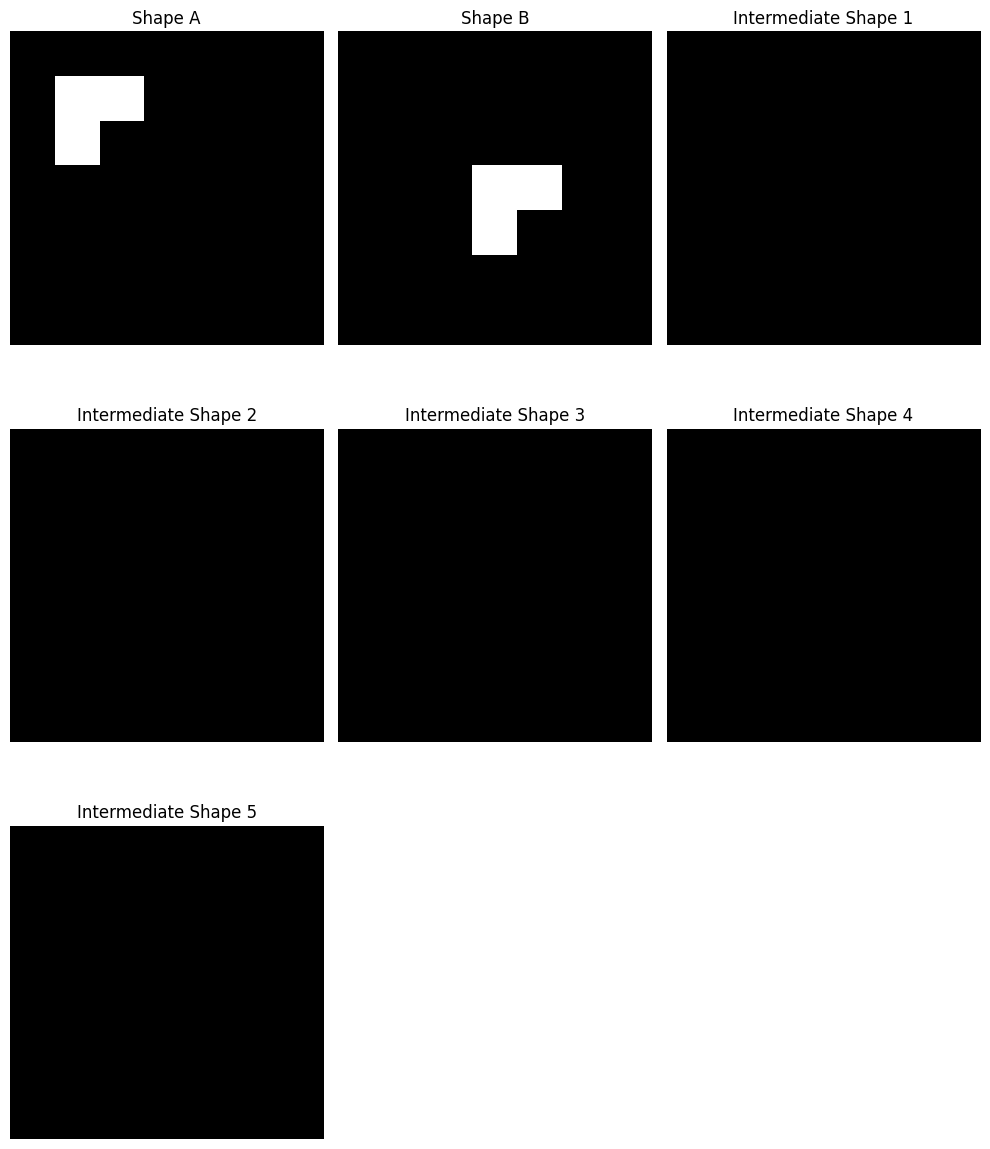

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_erosion, binary_dilation

def binary_morphological_interpolation(A, B, t):
    assert A.shape == B.shape, "Input arrays A and B must have the same shape"
    
    A_eroded = binary_erosion(A)
    B_eroded = binary_erosion(B)
    
    interpolated_eroded = t * A_eroded + (1 - t) * B_eroded
    
    interpolated_shape = binary_dilation(interpolated_eroded)
    
    return interpolated_shape

# Define binary shapes A and B (7x7 arrays)
A = np.array([[0, 0, 0, 0, 0, 0, 0],
              [0, 1, 1, 0, 0, 0, 0],
              [0, 1, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0]])

B = np.array([[0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 1, 1, 0, 0],
              [0, 0, 0, 1, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0]])

# Number of intermediate values
num_intermediate = 5

# Generate intermediate values
interpolated_shapes = []
for i in range(num_intermediate):
    t = i / (num_intermediate - 1)
    interpolated_shape = binary_morphological_interpolation(A, B, t)
    interpolated_shapes.append(interpolated_shape)

# Visualize the original shapes and the intermediate shapes
plt.figure(figsize=(10, 4 * (num_intermediate + 2)))

plt.subplot(num_intermediate + 2, 3, 1)
plt.imshow(A, cmap='gray')
plt.title('Shape A')
plt.axis('off')

plt.subplot(num_intermediate + 2, 3, 2)
plt.imshow(B, cmap='gray')
plt.title('Shape B')
plt.axis('off')

for i, shape in enumerate(interpolated_shapes):
    plt.subplot(num_intermediate + 2, 3, i + 3)
    plt.imshow(shape, cmap='gray')
    plt.title(f'Intermediate Shape {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


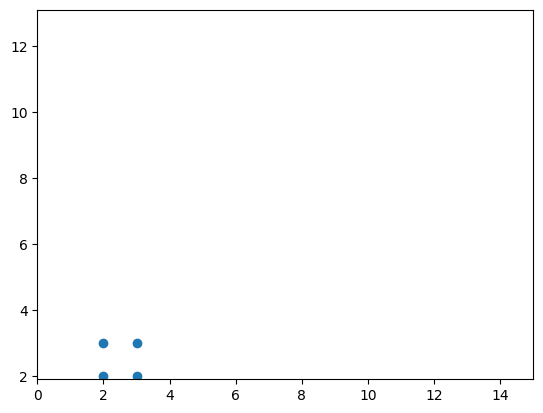

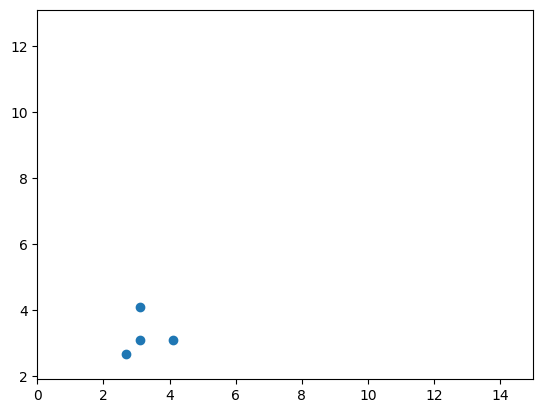

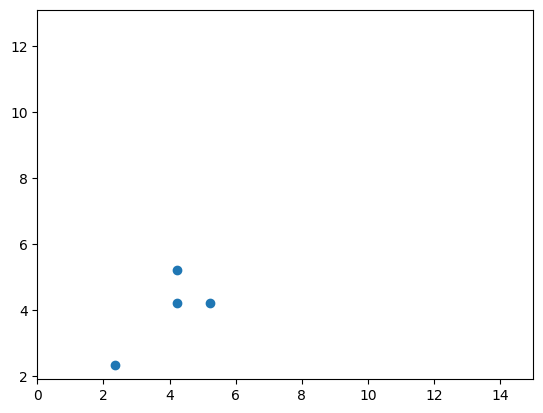

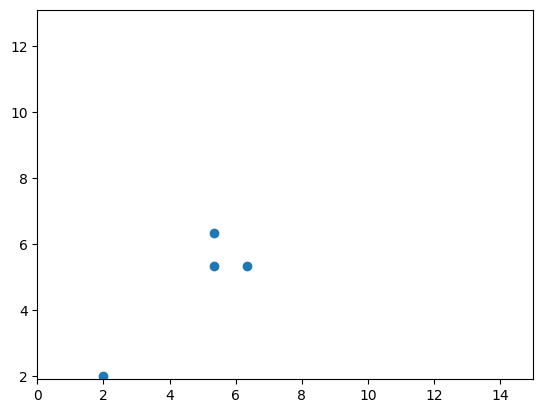

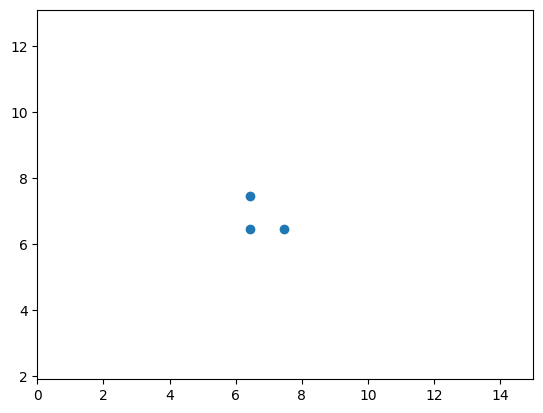

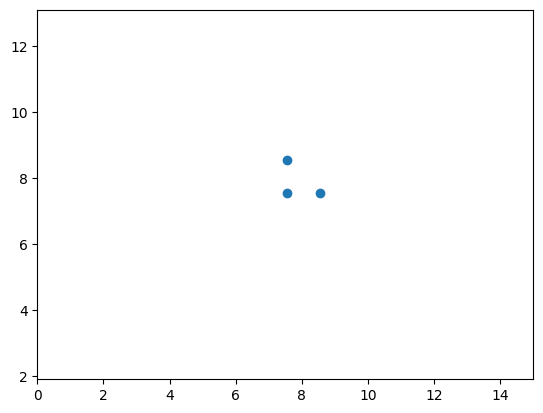

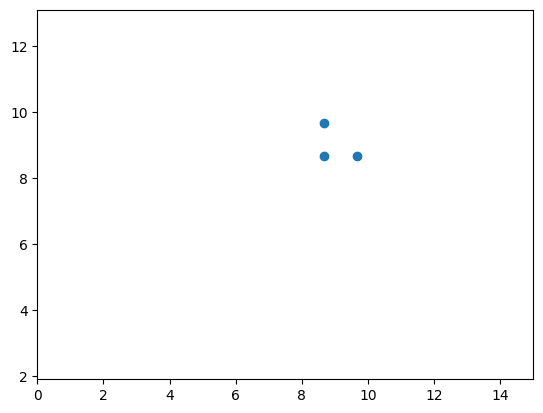

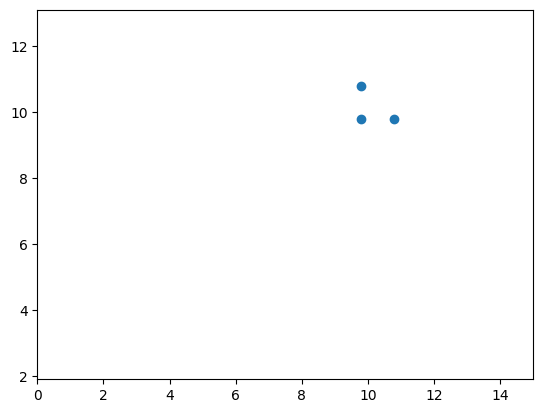

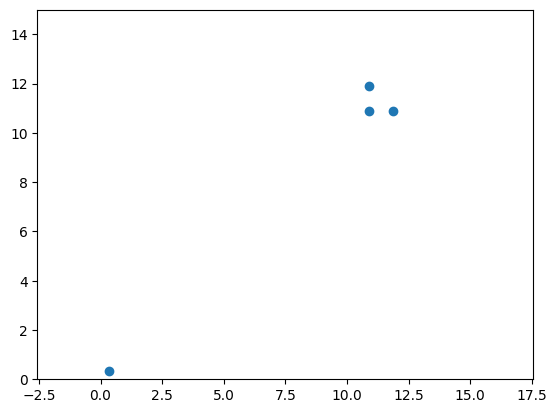

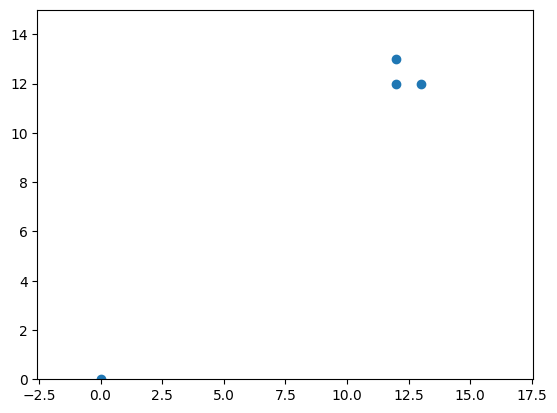

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def interpolate_points(shape_A, shape_B, t):
    # Interpolate point positions between the two shapes
    intermediate_shape = (1 - t) * shape_A + t * shape_B
    return intermediate_shape

# Example point shapes (replace with your point data)
shape_A = np.array([[2, 2],
                    [2, 3],
                    [3, 2],
                    [3, 3]])

shape_B = np.array([[12, 12],
                    [12, 13],
                    [13, 12]])

# Ensure both shapes have the same number of points for interpolation
num_points = max(shape_A.shape[0], shape_B.shape[0])
shape_A_normalized = np.pad(shape_A, ((0, num_points - shape_A.shape[0]), (0, 0)), mode='constant')
shape_B_normalized = np.pad(shape_B, ((0, num_points - shape_B.shape[0]), (0, 0)), mode='constant')

# Number of frames for interpolation
num_frames = 10

# Perform tweening and visualize intermediate shapes
for i in range(num_frames):
    t = i / (num_frames - 1)
    intermediate_shape = interpolate_points(shape_A_normalized, shape_B_normalized, t)
    
    # Visualization (scatter plot)
    plt.scatter(intermediate_shape[:, 0], intermediate_shape[:, 1])
    plt.axis('equal')
    plt.xlim(0, 15)
    plt.ylim(0, 15)
    plt.show()


In [38]:
from scipy.ndimage import distance_transform_edt
from scipy.interpolate import interpn

def ndgrid(*args,**kwargs):
    """
    Same as calling ``meshgrid`` with *indexing* = ``'ij'`` (see
    ``meshgrid`` for documentation).
    """
    kwargs['indexing'] = 'ij'
    return np.meshgrid(*args,**kwargs)

def bwperim(bw, n=4):
    """
    perim = bwperim(bw, n=4)
    Find the perimeter of objects in binary images.
    A pixel is part of an object perimeter if its value is one and there
    is at least one zero-valued pixel in its neighborhood.
    By default the neighborhood of a pixel is 4 nearest pixels, but
    if `n` is set to 8 the 8 nearest pixels will be considered.
    Parameters
    ----------
      bw : A black-and-white image
      n : Connectivity. Must be 4 or 8 (default: 8)
    Returns
    -------
      perim : A boolean image

    From Mahotas: http://nullege.com/codes/search/mahotas.bwperim
    """

    if n not in (4,8):
        raise ValueError('mahotas.bwperim: n must be 4 or 8')
    rows,cols = bw.shape

    # Translate image by one pixel in all directions
    north = np.zeros((rows,cols))
    south = np.zeros((rows,cols))
    west = np.zeros((rows,cols))
    east = np.zeros((rows,cols))

    north[:-1,:] = bw[1:,:]
    south[1:,:]  = bw[:-1,:]
    west[:,:-1]  = bw[:,1:]
    east[:,1:]   = bw[:,:-1]
    idx = (north == bw) & \
          (south == bw) & \
          (west  == bw) & \
          (east  == bw)
    if n == 8:
        north_east = np.zeros((rows, cols))
        north_west = np.zeros((rows, cols))
        south_east = np.zeros((rows, cols))
        south_west = np.zeros((rows, cols))
        north_east[:-1, 1:]   = bw[1:, :-1]
        north_west[:-1, :-1] = bw[1:, 1:]
        south_east[1:, 1:]     = bw[:-1, :-1]
        south_west[1:, :-1]   = bw[:-1, 1:]
        idx &= (north_east == bw) & \
               (south_east == bw) & \
               (south_west == bw) & \
               (north_west == bw)
    return ~idx * bw




def signed_bwdist(im):
    '''
    Find perim and return masked image (signed/reversed)
    '''    
    im = -bwdist(bwperim(im))*np.logical_not(im) + bwdist(bwperim(im))*im
    return im

def bwdist(im):
    '''
    Find distance map of image
    '''
    dist_im = distance_transform_edt(1-im)
    return dist_im

def interp_shape(top, bottom, precision):
    '''
    Interpolate between two contours

    Input: top 
            [X,Y] - Image of top contour (mask)
           bottom
            [X,Y] - Image of bottom contour (mask)
           precision
             float  - % between the images to interpolate 
                Ex: num=0.5 - Interpolate the middle image between top and bottom image
    Output: out
            [X,Y] - Interpolated image at num (%) between top and bottom

    '''
    if precision>2:
        print("Error: Precision must be between 0 and 1 (float)")

    top = signed_bwdist(top)
    bottom = signed_bwdist(bottom)

    # row,cols definition
    r, c = top.shape

    # Reverse % indexing
    precision = 1+precision

    # rejoin top, bottom into a single array of shape (2, r, c)
    top_and_bottom = np.stack((top, bottom))

    # create ndgrids 
    points = (np.r_[0, 2], np.arange(r), np.arange(c))
    xi = np.rollaxis(np.mgrid[:r, :c], 0, 3).reshape((r**2, 2))
    xi = np.c_[np.full((r**2),precision), xi]

    # Interpolate for new plane
    out = interpn(points, top_and_bottom, xi)
    out = out.reshape((r, c))

    # Threshold distmap to values above 0
    out = out > 0

    return out

# Define binary shapes A and B (7x7 arrays)
A = np.array([[1, 1, 1, 1, 0, 0, 0],
              [1, 1, 1, 1, 0, 0, 0],
              [1, 1, 1, 1, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0]])

B = np.array([[0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 1],
              [0, 0, 0, 1, 1, 1, 1],
              [0, 0, 0, 0, 1, 1, 1],
              [0, 0, 0, 0, 1, 1, 1]])

# Run interpolation
out = interp_shape(A, B, 0.5)

print(out)

[[False False False False False False False]
 [False False False False False False False]
 [False False False False False False False]
 [False False False False False False False]
 [False False False False False False False]
 [False False False False False False False]
 [False False False False False False False]]


In [26]:
# https://stackoverflow.com/questions/48818373/interpolate-between-two-images

import numpy as np
from scipy.ndimage import center_of_mass
from scipy.ndimage import shift

import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

import raster_geometry as rg

def inter(images,t):
    #input: 
    # images: list of arrays/frames ordered according to motion
    # t: parameter ranging from 0 to 1 corresponding to first and last frame 
    #returns: interpolated image

    #direction of movement, assumed to be approx. linear 
    a=np.array(center_of_mass(images[0]))
    b=np.array(center_of_mass(images[1]))
    v=a+t*(b-a) #convert t into vector 
    print(a,b,v)

    im1_shift= images[0] #shift(images[0],(b-a)*t, order=3) #shift frame 1
    im2_shift= images[1] #shift(images[1],-(b-a)*(1-t), order=3) #shift frame 2

    im1_shift = im1_shift*t
    im2_shift = im2_shift*(1-t)

    average = (im1_shift+im2_shift)/2.0

    return average #return average



# Define binary shapes A and B (7x7 arrays)
A = np.array([[1, 1, 1, 1, 0, 0, 0],
              [1, 1, 1, 1, 0, 0, 0],
              [1, 1, 1, 1, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0]])

B = np.array([[0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 1],
              [0, 0, 0, 1, 1, 1, 1],
              [0, 0, 0, 0, 1, 1, 1],
              [0, 0, 0, 0, 1, 1, 1]])

A = rg.circle(11,3)

B = rg.circle(11,5)

C = rg.circle(11, 4)

# Run interpolation
steps = 3
out = np.array([inter((A,B), i) for i in np.linspace(0.0, 1.0, steps)])

# print((out == C).all())

# Create a slider widget for temporal slices
temporal_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=steps-1,
    step=1,
    description='Temporal Slice:',
    continuous_update=False
)


# Create a function to update the visualization based on the slider value
def update_slice(temporal_slice):
    plt.pcolormesh(out[temporal_slice, :, :])
    #plt.title(f"Temporal Slice: {temporal_slice:.2f}")
    #plt.axis('off')
    plt.grid()
    #plt.show()
    ax = plt.gca()
    ax.set_aspect('equal')

# Link the slider to the update function
widgets.interactive(update_slice, temporal_slice=temporal_slider)

[5. 5.] [5. 5.] [5. 5.]
[5. 5.] [5. 5.] [5. 5.]
[5. 5.] [5. 5.] [5. 5.]


interactive(children=(IntSlider(value=0, continuous_update=False, description='Temporal Slice:', max=2), Outpu…

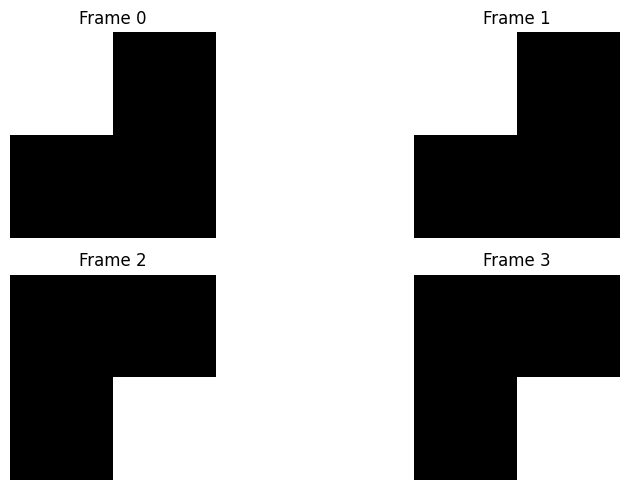

In [7]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Define the dimensions of the shapes (same for both)
height, width = 4, 4

# Define the binary shapes with different numbers of active pixels
shape1 = np.array([[1, 1, 0, 0],
                   [1, 1, 0, 0],
                   [0, 0, 0, 0],
                   [0, 0, 0, 0]], dtype=np.uint8)

shape2 = np.array([[0, 0, 0, 0],
                   [0, 0, 0, 0],
                   [0, 0, 1, 1],
                   [0, 0, 1, 1]], dtype=np.uint8)

# Determine the number of frames (steps) for the morphing
num_frames = 4

# Perform morphological tweening using a weighted average of the shapes
morphed_shapes = []
for i in range(num_frames):
    alpha = i / (num_frames - 1)  # Interpolation factor
    
    # Calculate the weighted average of the two shapes
    morphed_shape = cv2.addWeighted(shape1, 1 - alpha, shape2, alpha, 0)
    
    morphed_shapes.append(morphed_shape)

# Display the morphed shapes using matplotlib
plt.figure(figsize=(10, 5))
for i, shape in enumerate(morphed_shapes):
    plt.subplot(2, num_frames // 2, i + 1)
    plt.imshow(shape, cmap='gray')
    plt.title(f'Frame {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()


## Checking in smaller amplitude VTAs are included in the bigger ones

In [8]:
import numpy as np

def safe_div(x,y):
    if y == 0:
        return 0
    return x / y


# Define the binary volumes A and B (example)
volume_A = np.array([[[0, 0, 0],
                      [0, 1, 0],
                      [0, 0, 0]],

                     [[0, 0, 0],
                      [0, 1, 0],
                      [0, 0, 0]]], dtype=np.uint8)

volume_B = np.array([[[0, 0, 0],
                      [0, 1, 1],
                      [0, 0, 0]],

                     [[0, 0, 0],
                      [0, 1, 1],
                      [0, 0, 0]]], dtype=np.uint8)

# Verify if volume A is contained within volume B
def is_contained(volume_A, volume_B):
    return ((volume_A * volume_B) == volume_A).all(), np.sum(volume_A * np.invert(volume_B.astype(bool))), np.sum(volume_B)

# Check containment
contained, prop_, total = is_contained(volume_A, volume_B)

if contained:
    print("Volume A is contained within volume B.")
else:
    print("Volume A is not contained within volume B.")


Volume A is contained within volume B.


In [9]:
import numpy as np

data = np.load('/media/brainstimmaps/DATA/2009_DeepMaps01/04_Source/01_Development/deepmaps/data/processed/stn_space_3sigma/merged/flipped/VTAs/250um.npz')

VTAs = data['arr_0']


In [10]:
import pandas as pd

df = pd.read_csv('/media/brainstimmaps/DATA/2009_DeepMaps01/04_Source/01_Development/deepmaps/data/raw/tables/stn_space/merged/flipped/table_zeroed.csv')

df = df.drop(columns=('Unnamed: 0'))
df

,centerID,leadModel,patientID,contactID,verciseID,amplitude,massive_filename,mapping,mapping_score,part,lin_interp_score,step_interp_score,zeroed
0,Bern,Boston Scientific Vercise,1.0,0.0,0,1.0,/media/brainstimmaps/DATA/2009_DeepMaps01/03_D...,0.0,NaN,1.0,0.074074,0.0,0.0
1,Bern,Boston Scientific Vercise,1.0,0.0,0,1.5,/media/brainstimmaps/DATA/2009_DeepMaps01/03_D...,0.0,NaN,1.0,0.111111,0.0,0.0
2,Bern,Boston Scientific Vercise,1.0,0.0,0,2.0,/media/brainstimmaps/DATA/2009_DeepMaps01/03_D...,0.0,NaN,1.0,0.148148,0.0,0.0
3,Bern,Boston Scientific Vercise,1.0,0.0,0,2.5,/media/brainstimmaps/DATA/2009_DeepMaps01/03_D...,0.0,NaN,1.0,0.185185,0.0,0.0
4,Bern,Boston Scientific Vercise,1.0,0.0,0,3.0,/media/brainstimmaps/DATA/2009_DeepMaps01/03_D...,0.0,NaN,1.0,0.222222,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8590,Cologne,Boston Scientific Vercise,240.0,3.0,3,3.0,/media/brainstimmaps/DATA/2009_DeepMaps01/03_D...,1.0,0.5,1.0,0.500000,0.5,0.0
8591,Cologne,Boston Scientific Vercise,240.0,3.0,3,3.5,/media/brainstimmaps/DATA/2009_DeepMaps01/03_D...,0.0,NaN,1.0,0.500000,0.5,0.0
8592,Cologne,Boston Scientific Vercise,240.0,3.0,3,4.0,/media/brainstimmaps/DATA/2009_DeepMaps01/03_D...,1.0,0.5,1.0,0.500000,0.5,0.0
8593,Cologne,Boston Scientific Vercise,240.0,3.0,3,4.5,/media/brainstimmaps/DATA/2009_DeepMaps01/03_D...,0.0,NaN,0.0,0.500000,0.5,0.0


In [11]:
print(len(VTAs), len(df))

8595 8595


In [26]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'


# Group by 'patientID' and 'contactID'
grouped = df.groupby(['patientID', 'contactID'])

# Extract indices for each group
group_indices = {group: indices for group, indices in grouped.groups.items()}
count = 0
# Print group indices
print('Volume A         \tVolume B        \tOut vox    \tVolB  total\tPercentage')
for group, indices in group_indices.items():
    X = VTAs[indices]
    for i in range(len(X)-1):
        contained, proportion, total = is_contained(X[i], X[i+1])
        if not contained:
            count += 1
            if proportion/total.astype(float) > 0.2:
                print(f"{bcolors.WARNING}", end='')
            print(f'{df.at[indices[i], "massive_filename"].split("/")[-1]}   \t{df.at[indices[i+1], "massive_filename"].split("/")[-1]}   ', end='\t')
            print(f'{proportion}        \t{total}      \t{(proportion/total.astype(float)):.2%}')
            print(f"{bcolors.ENDC}", end='')
            #print(group, indices[i])

print(count)

Volume A         	Volume B        	Out vox    	VolB  total	Percentage
p001_c0_a4.nii   	p001_c0_a4.5.nii   	3        	6433      	0.05%
p001_c2_a1.5.nii   	p001_c2_a2.nii   	2        	1392      	0.14%
p001_c2_a3.5.nii   	p001_c2_a4.nii   	4        	5208      	0.08%
p001_c2_a4.nii   	p001_c2_a4.5.nii   	1        	6341      	0.02%
p001_c3_a3.nii   	p001_c3_a3.5.nii   	4        	3660      	0.11%
p001_c4_a3.nii   	p001_c4_a3.5.nii   	1        	3901      	0.03%
p001_c7_a4.nii   	p001_c7_a4.5.nii   	49        	6556      	0.75%
p001_c7_a4.5.nii   	p001_c7_a5.nii   	66        	8173      	0.81%
p001_c8_a3.5.nii   	p001_c8_a4.nii   	1        	5405      	0.02%
p001_c9_a2.5.nii   	p001_c9_a3.nii   	1        	2916      	0.03%
p001_c9_a3.nii   	p001_c9_a3.5.nii   	1        	4012      	0.02%
p001_c9_a3.5.nii   	p001_c9_a4.nii   	6        	5284      	0.11%
p001_c9_a4.nii   	p001_c9_a4.5.nii   	1        	6591      	0.02%
p001_c9_a4.5.nii   	p001_c9_a5.nii   	1        	7766      	0.01%
p001_c10_a2.nii   

p015_c15_a4.nii   	p015_c15_a4.5.nii   	20        	6577      	0.30%
p015_c15_a4.5.nii   	p015_c15_a5.nii   	44        	7865      	0.56%
p015_c15_a5.nii   	p015_c15_a5.5.nii   	49        	9735      	0.50%
p015_c15_a5.5.nii   	p015_c15_a6.nii   	241        	10823      	2.23%
p015_c15_a6.nii   	p015_c15_a6.5.nii   	193        	12359      	1.56%
p015_c15_a6.5.nii   	p015_c15_a7.nii   	267        	14277      	1.87%
p015_c15_a7.nii   	p015_c15_a7.5.nii   	526        	15480      	3.40%
p015_c15_a7.5.nii   	p015_c15_a8.nii   	337        	17069      	1.97%
p015_c16_a4.5.nii   	p015_c16_a5.nii   	5        	7903      	0.06%
p015_c16_a5.nii   	p015_c16_a5.5.nii   	127        	9241      	1.37%
p015_c16_a6.5.nii   	p015_c16_a7.nii   	1        	14076      	0.01%
p015_c16_a7.5.nii   	p015_c16_a8.nii   	3        	17415      	0.02%
p015_c17_a5.nii   	p015_c17_a5.5.nii   	166        	9076      	1.83%
p015_c18_a3.5.nii   	p015_c18_a4.nii   	1        	4544      	0.02%
p015_c18_a5.nii   	p015_c18_a5.5.nii  

## Checking if the VTAs are monotonically increasing with amplitude

In [1]:
import numpy as np
import pandas as pd
from termcolor import cprint


data = np.load('/media/brainstimmaps/DATA/2009_DeepMaps01/04_Source/01_Development/deepmaps/data/processed/stn_space_3sigma/merged/flipped/VTAs/250um.npz')
VTAs = data['arr_0']


df = pd.read_csv('/media/brainstimmaps/DATA/2009_DeepMaps01/04_Source/01_Development/deepmaps/data/raw/tables/stn_space/merged/flipped/table_zeroed.csv')
df = df.drop(columns=('Unnamed: 0'))


# Group by 'patientID' and 'contactID'
grouped = df.groupby(['patientID', 'contactID'])

# Extract indices for each group
group_indices = {group: indices for group, indices in grouped.groups.items()}

# Print group indices
for group, indices in group_indices.items():
    X = VTAs[indices]
    max_vox = np.sum(X[0])
    for i, VTA in enumerate(X[1:]):
        if np.sum(VTA)<max_vox:
            cprint(f'p{int(group[0])}_c{int(group[1])}_a{df.at[indices[i+1], "amplitude"]}', 'red')
        elif np.sum(VTA)==max_vox:
            cprint(f'p{int(group[0])}_c{int(group[1])}_a{df.at[indices[i+1], "amplitude"]}', 'yellow')


p38_c15_a1.5
p233_c12_a1.0
p234_c5_a1.0
p235_c1_a1.0


## Spatial morphing in 2D example

In [1]:
import numpy as np
from scipy.ndimage import center_of_mass, shift

def interpolate_sparse_shapes(shape1, shape2, num_frames):
    """
    Interpolate between two sparse, binary 2D numpy arrays over a number of frames.
    """
    
    assert shape1.shape == shape2.shape, "Shapes should have the same dimensions"
    
    # Find centroids
    centroid1 = np.array(center_of_mass(shape1))
    centroid2 = np.array(center_of_mass(shape2))
    
    # Vector connecting centroids from 1 to 2
    vector = centroid2 - centroid1
    
    frames = [shape1]  # Start with the initial shape
    for i in range(1, num_frames+1):
        alpha = i / (num_frames+1)  # Adjusted alpha to make the step proportional
        
        # Shift shapes without wrapping using mode='nearest'
        shifted_shape1 = shift(shape1*(1-alpha), alpha * vector, mode='nearest')
        shifted_shape2 = shift(shape2*alpha, -(1-alpha) * vector, mode='nearest')
        

        # Combine (OR) the shifted shapes to generate the frame
        frame = np.round(shifted_shape1+shifted_shape2+0.01)
        frames.append(frame)
    
    frames.append(shape2)  # End with the final shape
    
    return frames


# Example
shape1 = np.zeros((100, 100))
shape1[25:30, 25:30] = 1

shape2 = np.zeros((100, 100))
shape2[70:75, 70:75] = 1

frames = interpolate_sparse_shapes(shape1, shape2, 10)

print(frames[2][0:10, 0:10])
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# Assume you've already run the interpolate_sparse_shapes function and generated frames

def plot_frame(frame_idx):
    plt.imshow(frames[frame_idx], cmap='gray')
    plt.axis('off')
    plt.show()

# Create an interactive slider
widgets.interact(plot_frame, frame_idx=widgets.IntSlider(min=0, max=len(frames)-1, step=1, value=0))



[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


interactive(children=(IntSlider(value=0, description='frame_idx', max=11), Output()), _dom_classes=('widget-in…

<function __main__.plot_frame(frame_idx)>

In [27]:
A = np.array([
    [0.2, 0.5, 1], 
    [1, 0.2, 0],
    [0, 1, 0.3]])

np.ceil(A)

array([[1., 1., 1.],
       [1., 1., 0.],
       [0., 1., 1.]])

In [1]:
import raster_geometry as rg
import numpy as np
from scipy.ndimage import center_of_mass, shift, binary_fill_holes

def within_radius(A_shape, interpolated_com, interpolated_radius):
    # Generate coordinate matrices
    x = np.arange(A_shape[0])
    y = np.arange(A_shape[1])
    z = np.arange(A_shape[2])
    X, Y, Z = np.meshgrid(x, y, z)
    
    # Compute distance matrix
    distance_matrix = np.sqrt((X - interpolated_com[0])**2 + (Y - interpolated_com[1])**2 + (Z - interpolated_com[2])**2)
    
    # Return binary matrix indicating whether each location is within the interpolated radius
    return (distance_matrix <= interpolated_radius).astype(int)

def compute_radius(array, com):
    # Find all non-zero (i.e. value 1) coordinates
    x, y, z = np.where(array)
    max_distance = 0
    # Compute the distance of each point from the center of mass
    for i in range(len(y)):
        distance = np.sqrt((x[i] - com[0])**2 + (y[i] - com[1])**2 + (z[i] - com[2])**2)
        max_distance = max(max_distance, distance)
    return max_distance

def interpolate_sparse_shapes(shape1, shape2, num_frames):
    """
    Interpolate between two sparse, binary 2D numpy arrays over a number of frames.
    """
    
    assert shape1.shape == shape2.shape, "Shapes should have the same dimensions"
    
    # Find centroids
    centroid1 = np.array(center_of_mass(shape1))
    centroid2 = np.array(center_of_mass(shape2))
    
    radius1 = compute_radius(shape1, centroid1)
    radius2 = compute_radius(shape2, centroid2)
    # Vector connecting centroids from 1 to 2
    vector = centroid2 - centroid1

    print(centroid1)
    frames = [shape1]  # Start with the initial shape
    for i in range(1, num_frames+1):
        alpha = i / (num_frames+1)  # Adjusted alpha to make the step proportional
        
        # Shift shapes without wrapping using mode='nearest'
        shifted_shape1 = shift(shape1*(1-alpha), alpha * vector, mode='constant', order=1)
        shifted_shape2 = shift(shape2*alpha, -(1-alpha) * vector, mode='constant', order=1)

        interpolated_radius = alpha * radius2 + (1-alpha) * radius1

        # Combine (OR) the shifted shapes to generate the frame
        frame = shifted_shape1+shifted_shape2

        new_centroid = alpha * centroid2 + (1-alpha) * centroid1
        print(new_centroid)
        mask = within_radius(shape1.shape, new_centroid, interpolated_radius)

        frame = np.heaviside(frame*mask, 0.0)

        #frames.append()
        frames.append(binary_fill_holes(frame))
    print(centroid2)
    frames.append(shape2)  # End with the final shape

    return frames

A = rg.sphere(100, 6, position = (0.2, 0.2, 0.2))

B = rg.sphere(100, 25, position = (0.2, 0.2, 0.6))

frames = interpolate_sparse_shapes(A, B, 10)

import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# Assume you've already run the interpolate_sparse_shapes function and generated frames

def plot_frame(frame_idx, z):
    plt.imshow(frames[frame_idx][z], cmap='gray')
    plt.axis('off')
    plt.show()

# Create an interactive slider
widgets.interact(
    plot_frame, 
    frame_idx=widgets.IntSlider(min=0, max=len(frames)-1, step=1, value=0), 
    z=widgets.IntSlider(min=0, max=len(frames[0])-1, step=1, value=0))



[19.7978022 19.7978022 19.7978022]
[19.84992699 19.84992699 23.39805082]
[19.90205179 19.90205179 26.99829945]
[19.95417659 19.95417659 30.59854807]
[20.00630139 20.00630139 34.1987967 ]
[20.05842618 20.05842618 37.79904532]
[20.11055098 20.11055098 41.39929395]
[20.16267578 20.16267578 44.99954257]
[20.21480058 20.21480058 48.5997912 ]
[20.26692537 20.26692537 52.20003982]
[20.31905017 20.31905017 55.80028845]
[20.37117497 20.37117497 59.40053707]


interactive(children=(IntSlider(value=0, description='frame_idx', max=11), IntSlider(value=0, description='z',…

<function __main__.plot_frame(frame_idx, z)>

In [ ]:
# shifting works but not scaling if the radius increases. 
#
# 1) radius of activation : calculate the smallest inclusive radius from A and B. 
# 2) linearly interpolate radius with alpha -> Rad_A (3) * alpha (0.2) + Rad_B (4) * 1-alpha (0.8)
# 3) exclude all voxels that are not within interpolated radius of new shape's center of mass 

In [29]:
import numpy as np
from scipy import ndimage

def fill_holes(binary_image, structure=None):
    return ndimage.binary_fill_holes(binary_image, structure=structure)

# Sample usage:
binary_image = np.array([
    [0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
])

# For 4-connectivity (default)
filled_image_4conn = fill_holes(binary_image)

print("Filled with 4-connectivity:\n", filled_image_4conn)

# For 8-connectivity
structure_8conn = np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]])
filled_image_8conn = fill_holes(binary_image, structure=structure_8conn)

print("\nFilled with 8-connectivity:\n", filled_image_8conn)


Filled with 4-connectivity:
 [[False False False False False]
 [False  True  True False False]
 [False  True  True  True False]
 [False  True  True  True False]
 [False False False False False]]

Filled with 8-connectivity:
 [[False False False False False]
 [False  True  True False False]
 [False  True False  True False]
 [False  True  True  True False]
 [False False False False False]]
